In [100]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import random
from tensorflow.keras import layers, Input
from sklearn.metrics import mean_absolute_error

In [101]:
def nb_to_array(nb):
    list = []
    for i in range(nb):
        list.append(0)
    list.append(1)
    for i in range(10-nb-1):
        list.append(0)
    return list

In [102]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [103]:
X_train.shape

(60000, 28, 28)

In [104]:
X_train[X_train >= 128] = 255
X_test[X_test >= 128] = 255

In [105]:
X_train[X_train < 128] = 0
X_test[X_test < 128] = 0

In [106]:
X_train.shape

(60000, 28, 28)

In [107]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [108]:
y_train_m = np.array([nb_to_array(5)])
for i in range(y_train.shape[0]):
    y_train_m = np.append(y_train_m, [nb_to_array(y_train[i])], axis=0)
y_train_m = np.delete(y_train_m, 0, axis=0)

In [109]:
y_test_m = np.array([nb_to_array(5)])
for i in range(y_test.shape[0]):
    y_test_m = np.append(y_test_m, [nb_to_array(y_test[i])], axis=0)
y_test_m = np.delete(y_test_m, 0, axis=0)

In [110]:
y_train_m[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [111]:
y_test_m[:5]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [112]:
print(y_train.shape)
print(y_train_m.shape)

(60000,)
(60000, 10)


In [113]:
print('Avant normalisation : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))

X_max = X_train.max()
X_train  = X_train / X_max
X_test = X_test / X_max

print('Après normalisation : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))

Avant normalisation : Minimum = 0, Maximum = 255
Après normalisation : Minimum = 0.0, Maximum = 1.0


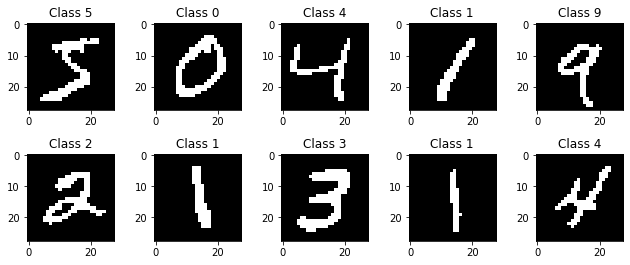

In [114]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    
plt.tight_layout()

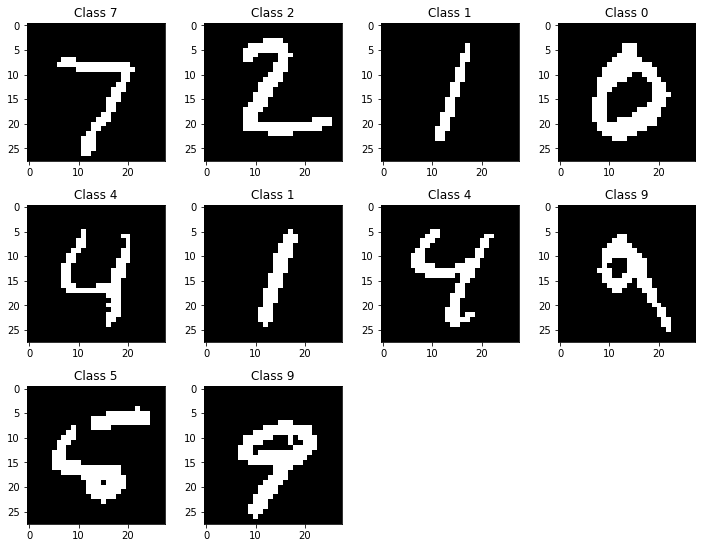

In [115]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

for i in range(10):
    
    plt.subplot(4,4,i+1)
    plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
    plt.imshow(X_test[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_test[i]))
    
plt.tight_layout()

In [116]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [117]:
X_train = X_train.astype('uint8')

In [118]:
y_test = y_test.reshape(y_test.shape[0], 1)

In [119]:
y_train = y_train.reshape(y_train.shape[0], 1)

In [135]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("=============")
print(y_train_m.shape)
print(y_test_m.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)
(60000, 10)
(10000, 10)


In [136]:
model = keras.Sequential()

model.add(Input(shape=(784,)))

model.add(layers.Dense(256, activation="relu")),

model.add(layers.Dense(128, activation="relu")),

model.add(layers.Dense(64, activation="relu")),

model.add(layers.Dense(1))

In [137]:
model.compile(
    optimizer='adam',
    loss="mae",
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [138]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model-mnist.h5', verbose=1, save_best_only=True, save_weights_only=True)
]   

In [139]:
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=32,
    epochs=10000,
    validation_data=(X_test, y_test),
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10000
1850/1875 [============================>.] - ETA: 0s - loss: 0.7329 - mean_absolute_error: 0.7329
Epoch 00001: val_loss improved from inf to 0.45873, saving model to model-mnist.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7297 - mean_absolute_error: 0.7297 - val_loss: 0.4587 - val_mean_absolute_error: 0.4587
Epoch 2/10000
1856/1875 [============================>.] - ETA: 0s - loss: 0.3530 - mean_absolute_error: 0.3530
Epoch 00002: val_loss improved from 0.45873 to 0.28331, saving model to model-mnist.h5
1875/1875 [==============================] - 2s 961us/step - loss: 0.3525 - mean_absolute_error: 0.3525 - val_loss: 0.2833 - val_mean_absolute_error: 0.2833
Epoch 3/10000
1868/1875 [============================>.] - ETA: 0s - loss: 0.2281 - mean_absolute_error: 0.2281
Epoch 00003: val_loss improved from 0.28331 to 0.23240, saving model to model-mnist.h5
1875/1875 [==============================] - 2s 992us/step - loss: 0.2278 - mean_absolute_error

1833/1875 [============================>.] - ETA: 0s - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 00025: val_loss did not improve from 0.12882
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383
Epoch 26/10000
1853/1875 [============================>.] - ETA: 0s - loss: 0.0449 - mean_absolute_error: 0.0449
Epoch 00026: val_loss did not improve from 0.12882
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - val_loss: 0.1367 - val_mean_absolute_error: 0.1367
Epoch 27/10000
1865/1875 [============================>.] - ETA: 0s - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 00027: val_loss did not improve from 0.12882
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.1310 - val_mean_absolute_error: 0.1310
Epoch 28/10000
1827/1875 [============================>.] 

Epoch 50/10000
1839/1875 [============================>.] - ETA: 0s - loss: 0.0144 - mean_absolute_error: 0.0144
Epoch 00050: val_loss did not improve from 0.11705
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - val_loss: 0.1184 - val_mean_absolute_error: 0.1184
Epoch 51/10000
1861/1875 [============================>.] - ETA: 0s - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 00051: val_loss did not improve from 0.11705
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - val_loss: 0.1183 - val_mean_absolute_error: 0.1183
Epoch 52/10000
1830/1875 [============================>.] - ETA: 0s - loss: 0.0141 - mean_absolute_error: 0.0141
Epoch 00052: val_loss did not improve from 0.11705
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - val_loss: 0.1175 - val_mean_absolute_error: 0.1175
Epoch 53/10000
1852/1875 [=================

Epoch 75/10000
1858/1875 [============================>.] - ETA: 0s - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 00075: val_loss did not improve from 0.11685
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - val_loss: 0.1173 - val_mean_absolute_error: 0.1173
Epoch 76/10000
1859/1875 [============================>.] - ETA: 0s - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 00076: val_loss did not improve from 0.11685
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - val_loss: 0.1176 - val_mean_absolute_error: 0.1176
Epoch 77/10000
1862/1875 [============================>.] - ETA: 0s - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 00077: val_loss did not improve from 0.11685
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - val_loss: 0.1176 - val_mean_absolute_error: 0.1176
Epoch 78/10000
1874/1875 [=================

In [140]:
y_pred = model.predict(X_test)
val_mae = mean_absolute_error(y_pred, y_test)
print("Validation MAE for Model: {}".format(val_mae))

Validation MAE for Model: 0.11800917983055115


In [141]:
y_pred = model.predict(X_test)

In [142]:
X_train.shape

(60000, 784)

In [143]:
X_test.shape

(10000, 784)

In [145]:
for i in range(y_pred.shape[0]):
    y_pred[i, 0] = round(y_pred[i, 0])

In [147]:
y_pred[:10]

array([[7.],
       [2.],
       [1.],
       [0.],
       [4.],
       [1.],
       [4.],
       [9.],
       [6.],
       [9.]], dtype=float32)

In [149]:
y_test[0:10]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9]], dtype=uint8)

In [150]:
nb_erreur = 0
tab = []
for i in range(y_pred.shape[0]):
    if y_pred[i] != y_test[i]:
        nb_erreur += 1
        tab.append(i)
print("pourcentage erreur = "+str(nb_erreur/y_pred.shape[0]*100)+" , "+str(nb_erreur)+"/"+str(y_pred.shape[0]))

pourcentage erreur = 4.3 , 430/10000


TypeError: Invalid shape (49,) for image data

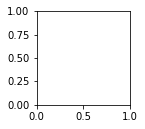

In [112]:
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
for i in range(len(tab)): 
    plt.subplot(5,5,i+1)
    plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
    plt.imshow(X_test[tab[i]], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_test[tab[i]]))
    
plt.tight_layout()

In [227]:
tab[1]

38

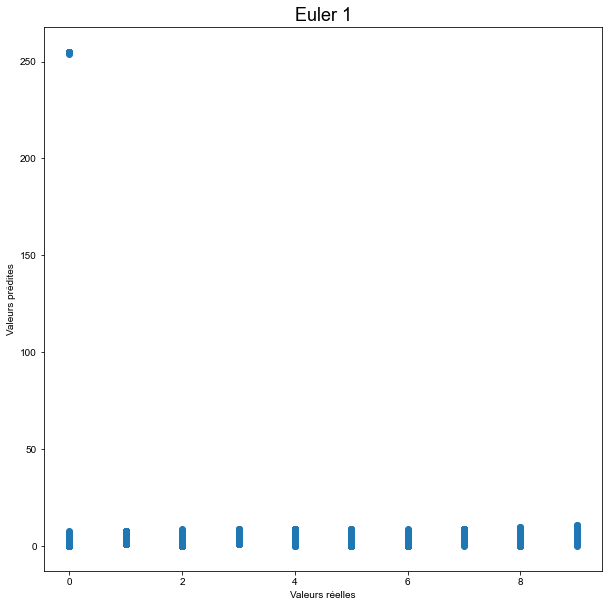

In [113]:
axe = plt.axes()
plt.rcParams.update({'font.size':15})
plt.style.use('seaborn-whitegrid')
plt.scatter(y_test, y_pred)
plt.title('Euler ' + str(i+1))
axe.set(xlabel="Valeurs réelles", ylabel="Valeurs prédites")
plt.show()